[array([1.44345369e-07, 2.54047633e-07, 3.63367245e-07, 6.18239753e-07]), array([1.12386434e-07, 2.48426089e-07, 3.83179713e-07, 6.36007764e-07]), array([8.61712236e-08, 2.43062492e-07, 3.97667215e-07, 6.53099070e-07]), array([6.32049899e-08, 2.37936046e-07, 4.09331380e-07, 6.69527585e-07]), array([4.24377453e-08, 2.33021460e-07, 4.19208213e-07, 6.85332582e-07]), array([2.32993560e-08, 2.28296319e-07, 4.27844690e-07, 7.00559635e-07]), array([5.43610345e-09, 2.23741427e-07, 4.35568327e-07, 7.15254142e-07]), array([-1.13906564e-08,  2.19340399e-07,  4.42591460e-07,  7.29458798e-07]), array([-2.73515589e-08,  2.15079195e-07,  4.49059661e-07,  7.43212703e-07]), array([-4.25739432e-08,  2.10945711e-07,  4.55077034e-07,  7.56551199e-07]), array([-5.71560156e-08,  2.06929440e-07,  4.60720540e-07,  7.69506035e-07]), array([-7.11755169e-08,  2.03021208e-07,  4.66048645e-07,  7.82105665e-07]), array([-8.46953090e-08,  1.99212949e-07,  4.71106778e-07,  7.94375581e-07]), array([-9.77671263e-08,  1

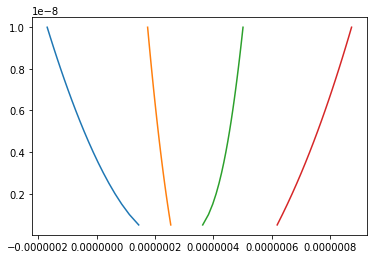

In [7]:
import matplotlib.pyplot as plt
import numpy as np

l              = 2e-6 #metres
shear_modulus  = 26e9 #Pa
poissons_ratio = 0.33
burgers_vector = 0.256e-9 #metres
x_coords       = l*np.array([0.1,0.13,0.16,0.3])
B              = 10**-4
timestep       = 0.05e-8
time           = 0
time_y         = []
positions      = []


def get_internal_stress(x_coords,shear_modulus,burgers_vector, poissons_ratio): # To get the stress exerted by other dislocations on a single dislocation for all dislocations
    K           = np.array([])
    for i in range(len(x_coords)):
            new = np.delete(x_coords,i)                                         # Array without i-th element
            S   = ((shear_modulus*burgers_vector)/(2*np.pi*(1-poissons_ratio)))*(1/(x_coords[i]-new))
            K   = np.append(K,np.sum(S))
            
    return K
            
def velocity(burgers_vector,B,shearstress):  # To find velocity of the dislocation for a given stress for all dislocations
    return (burgers_vector*shearstress)/B             

for i in range(20):                          # To find the position of each dislocations
    T        = get_internal_stress(x_coords,shear_modulus,burgers_vector, poissons_ratio)
    V        = velocity(burgers_vector,B,T)
    x_coords = x_coords + timestep * V
    
    time     = time + timestep
    time_y.append(time)
    positions.append(x_coords)
    

  
print(positions)
    
plt.plot(positions,time_y)
plt.show()

    